# Get data

We first install *gdown*, so that we can fetch the data from Google Drive into the local archive (see folder symbol on the left), so that we can work with the data. Once we close the workbook, the data will be cleared from the local archive.

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1tgzxuGJ2acSzJr441BSbU-osyHRL1LcU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tgzxuGJ2acSzJr441BSbU-osyHRL1LcU
To: /content/sequences_full_all.csv
100% 127k/127k [00:00<00:00, 80.4MB/s]


# Data-set

We make use of a data-set describing eye movement patterns and choices of a lab experiment in which participants decided whether they would get screened for Chlamydia under certain circumstance (e.g., when screening would cost them £10, but the risk of a serious complication after deciding not to screen would be 25%).
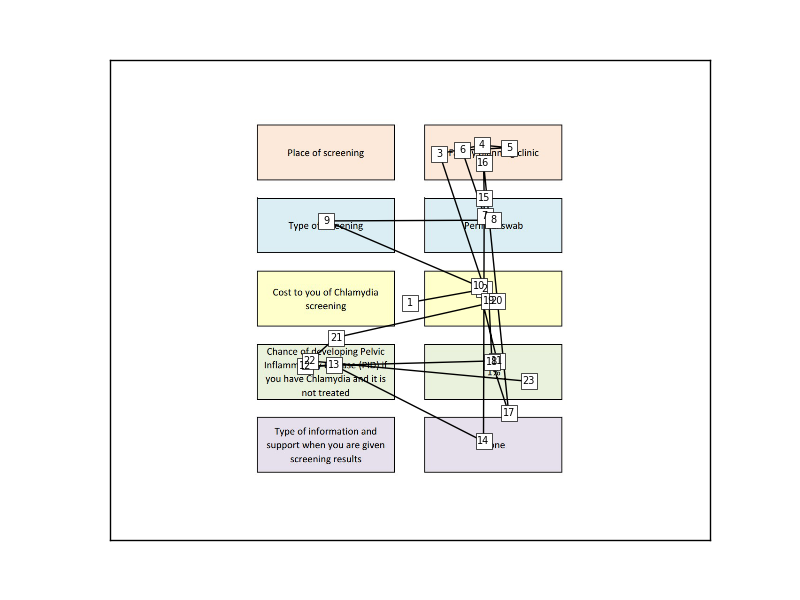

# Importing packages

First we need to import the various packages. Below are the ones that we expect to use. We can also import packages at a later stage.

In [ ]:
#import packages
import pandas as pd #for data-frames
import numpy as np #for matrix operatons
from sklearn.model_selection import train_test_split #split training and test
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.metrics import roc_curve #roc
from sklearn.metrics import auc #auc
from sklearn.ensemble import RandomForestClassifier #random forest

# Loading data

We next need to load the data. Make sure the data are in the same folder as where you run the notebook, or use a path towards the right location.

We create some extra columns so that we can also use PID risk and cost as numeric values (but for now, we consider them as nominal variables, each with four levels).

We also remove instances where participants chose neither option ("No answer").

## Exercise 1 

* Determine how many "No answer" selections there were.
* Determine how many choices each participant made.
* Compute the percentage of "Accept" decisions per participant.
* Compute the average percentage of "Accept" decision per level of Cost and PID.
* Plot these percentages in two separate barplots.
* Compute the overall percentage of "Accept" decisions.

**Warning**: Answers are shown in the chunks below (so ignore if you want to do the exercises yourself first).

In [ ]:
#load the data and show the first lines
choices = pd.read_csv("sequences_full_all.csv")
choices.head()

,Participant,ChoiceNumber,row_seq,Choice,PID,Cost,Type,Place,Support
0,1,1,00/11/00/00/00/Family planning clinic/Family p...,Accept,10%,£5,Full pelvic,Family planning clinic,None
1,1,2,00/12/00/Family planning clinic/00/11/00/00/00...,Reject,1%,£10,Perineal swab,Family planning clinic,None
2,1,3,00/£10/Urine test/Urine test/£10/Urine test/Ur...,Reject,10%,£10,Urine test,GUM clinic,Health advisor
3,1,4,00/12/12/At home/At home/00/00/00/00/00/At hom...,Reject,5%,£5,Perineal swab,At home,Health advisor
4,1,5,00/At home/At home/00/11/11/At home/11/00/00/0...,Accept,1%,Free,Urine test,At home,None


In [ ]:
# Number of "No answer" = 7
choices = pd.read_csv("sequences_full_all.csv")
choices.value_counts("Choice")

Choice
Accept       329
Reject       144
No answer      7
dtype: int64

In [ ]:
# Number of choices per participant = 16
# Use value counts to check whether this was indeed 16 for each participant
choices.value_counts("Participant")

Participant
1     16
2     16
29    16
28    16
27    16
26    16
25    16
24    16
23    16
22    16
21    16
20    16
19    16
18    16
17    16
16    16
15    16
14    16
13    16
12    16
11    16
10    16
9     16
8     16
7     16
6     16
5     16
4     16
3     16
30    16
dtype: int64

<Axes: xlabel='Perc', ylabel='Su'>

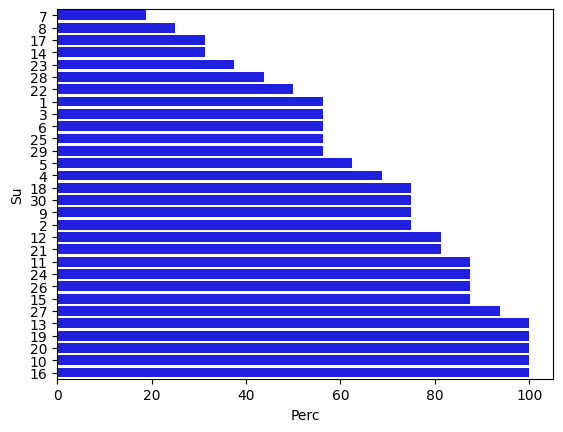

In [ ]:
import seaborn as sns
# Percentage of accept choices per participant
# There are several ways to do this. One is by creating a binary variable that has the value 1 for Accept and 0 otherwise
# The average of this variable will give the proportion of accept choices per participant
choices['choice_bin'] = np.where(choices['Choice']=='Accept', 1, 0)

#This line already provides the answer that you are looking for
perc = 100*choices.groupby(['Participant'])['choice_bin'].mean()

#But with a bit more effort we can plot the results
su_name = pd.unique(choices['Participant'].astype("string"))
mean_vals = pd.DataFrame({'Su': su_name, 'Perc': perc})
mean_vals = mean_vals.sort_values(['Perc']).reset_index(drop=True)
mean_vals.head()

sns.barplot(x='Perc', y='Su', data=mean_vals, orient = 'h', color='b')

<Axes: xlabel='PID', ylabel='choice_bin'>

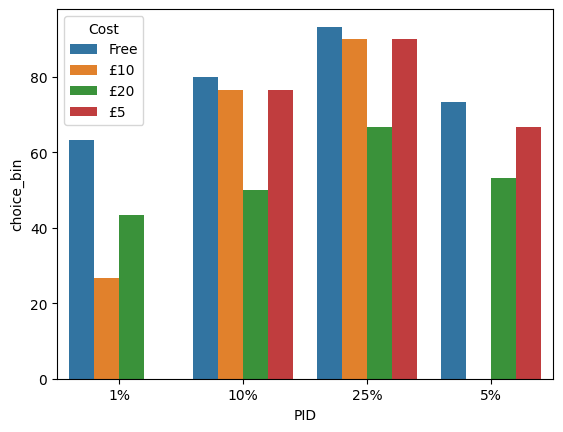

In [ ]:
#Average percentage of "Accept" decision per level of Cost and PID
#This can be interpreted as: per level of Cost, per level of PID, or per combination
#We look at the combinations. We first compute the value per participant and then average across participants, so that each participant contributes equally.
#In this particular situation (each participant had the same choices) the result is likely to be the same as when we do not aggregate per participant first.

perc_su = 100*choices.groupby(['Participant','PID','Cost'])['choice_bin'].mean()
perc_su = perc_su.reset_index()
perc_PID_Cost = perc_su.groupby(['PID','Cost'])['choice_bin'].mean()
perc_PID_Cost = perc_PID_Cost.reset_index()

#When we plot the data, we see that combinations are not in the data-set
sns.barplot(x='PID', y='choice_bin', data=perc_PID_Cost, hue = 'Cost')

<Axes: xlabel='PID', ylabel='choice_bin'>

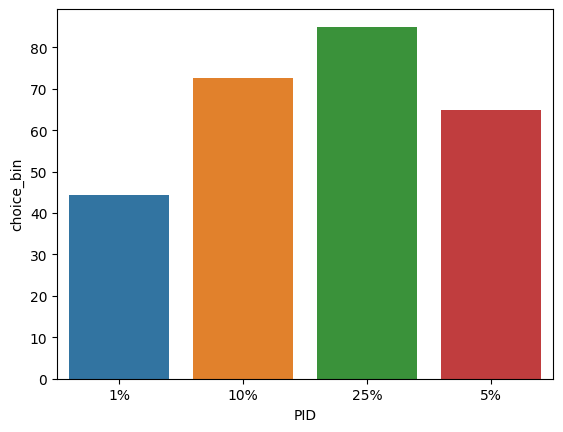

In [ ]:
#The second part asks for two separate barplots

perc_su = 100*choices.groupby(['Participant','PID'])['choice_bin'].mean()
perc_su = perc_su.reset_index() #we seem to get repeat labels when reset_index is included in the above line
perc_PID = perc_su.groupby(['PID'])['choice_bin'].mean()
perc_PID = perc_PID.reset_index()

#When we plot the data, we see that combinations are not in the data-set
sns.barplot(x='PID', y='choice_bin', data=perc_PID)

<Axes: xlabel='Cost', ylabel='choice_bin'>

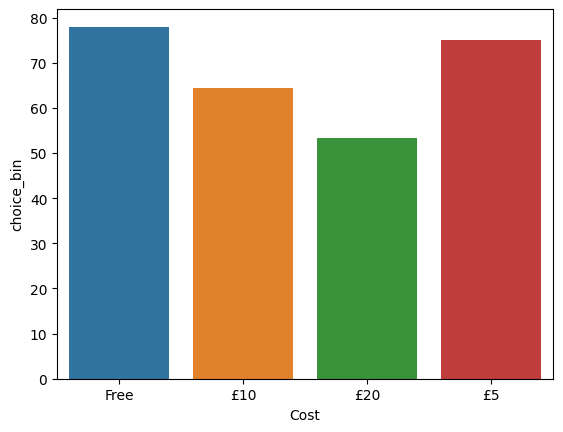

In [ ]:
perc_su = 100*choices.groupby(['Participant','Cost'])['choice_bin'].mean()
perc_su = perc_su.reset_index()
perc_Cost = perc_su.groupby(['Cost'])['choice_bin'].mean()
perc_Cost = perc_Cost.reset_index()

#When we plot the data, we see that combinations are not in the data-set
sns.barplot(x='Cost', y='choice_bin', data=perc_Cost)

In [ ]:
#Compute the overall percentage of "Accept" decisions.
print(100*choices['choice_bin'].mean())

#After removing "No answer"

choices = choices[choices['Choice'] != "No answer"]
print(100*choices['choice_bin'].mean())


68.54166666666667
69.55602536997885


In [ ]:
#Check that the data no longer has "No answer" responses
choices['Choice'].value_counts()

Accept    329
Reject    144
Name: Choice, dtype: int64

In [ ]:
#Here we do a bit of pre-processing. These extra variables can be used if we want to use PID risk and Cost as continuous predictors. 
#In the forthcoming exercises we use these as nominal variables, but you could argue that is not really a good approach, 
#because they are actually continuous variables. These variables will allow to use continuous variables instead.

#create a numeric column for PID risk
choices['PID_numeric'] = choices['PID'].str.replace('%','')
choices['PID_numeric'] = pd.to_numeric(choices['PID'].str.replace('%',''))

#create a numeric column for cost
choices['Cost_numeric'] = choices['Cost'].str.replace('£','')
choices['Cost_numeric'] = pd.to_numeric(choices['Cost_numeric'].str.replace('Free','0'))
choices['Cost'] = choices['Cost'].str.replace('£','P')

#remove spaces in names; sometimes spaces can be an issue in names (particularly column names)
choices['Support'] = choices['Support'].str.replace(' ','')
choices['Place'] = choices['Place'].str.replace(' ','')
choices['Type'] = choices['Type'].str.replace(' ','')

<ipython-input-46-4fe62d9ebb59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choices['PID_numeric'] = choices['PID'].str.replace('%','')
<ipython-input-46-4fe62d9ebb59>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choices['PID_numeric'] = pd.to_numeric(choices['PID'].str.replace('%',''))
<ipython-input-46-4fe62d9ebb59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# Create dummy variables

To use sklearn, we first need to convert the predictors (PID risk, cost, type, place and support to dummy variables). We also need to convert the response category to a dummy coded category (we choose 1 = accept). Note that PID risk and cost are converted to dummy variables, because we treat them as nominal variables.

In [ ]:
#We are going to predict on the basis of the categories of PID risk, choice, type, place and support
#first we need to convert these to dummy variables
#for the predicted value, we also create a 1-0 variable with 1 = Accept
X = pd.get_dummies(choices[['PID', 'Cost', 'Type', 'Place', 'Support']])
y = pd.get_dummies(choices[['Choice']]).Choice_Accept
X.head()

,PID_1%,PID_10%,PID_25%,PID_5%,Cost_Free,Cost_P10,Cost_P20,Cost_P5,Type_Fullpelvic,Type_Perinealswab,Type_Urinetest,Place_AtGPclinic,Place_Athome,Place_Familyplanningclinic,Place_GUMclinic,Support_Healthadvisor,Support_None
0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
3,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1


# Split between training and test

We start by splitting the data between a training and a test set. We are going to use k-NN in the first instance, which has a hyperparameter ("k"), but we start by assuming we are not going to determine the optimal value of this hyperparameter in the traditional sense (using a separate validation set, extracted from the training set).

This is a relatively small data-set and we will see that the results will depend on the split between training and test. Normally, a single split between training and test is used, and subsequent repeat splits of the training set (e.g., cross-validation), but we will see that for smaller data-sets it might be wise to also repeat the split between training and test.

In this instance, we will be interested in whether performance on the test set is better for a k-NN with k = 5 than with k = 3. We focus on performance on the test set, since we expect better fitting of the data on the training set with higher values of k (possible overfitting).

We assume that the observations of the different participants are independent (we consider all choices as one large set of choices and ignore that they came from different participants). Under this assumption, we can use the traditional methods of sklearn for splitting the data. An alternative approach would be to sample a subset of participants for the training set (and the remaining participants as the test set), and to keep the choices of one participant together. This way of splitting would examine the question: "If a new participant entered the lab, how well could I predict their decisions on the basis of the participants who have already visited the lab?".

The split function in sklean has two important parameters:
* The random state, which sets the random number generator
* Whether stratified sampling must be used

We set the random state to 10 and stratified sampling to "y".

In [ ]:
#We then split the set between train and test, where we stratify by response to get a similar proportion of accept #responses in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, stratify = y)

#compute proportion "accept" in train and test
print(np.mean(y_train), np.mean(y_test))

0.6949152542372882 0.6974789915966386


## Exercise 2

* Determine how the percentage of Accept choices in the training and test set changes if the random state is set to 100
* Determine how the percentage of Accept choices in the training and test set changes if stratified sampling is disabled

**Answers below**

In [ ]:
#percentage of Accept choices in the training and test set changes if the random state is set to 100
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, stratify = y)

#compute proportion "accept" in train and test
print(np.mean(y_train), np.mean(y_test))

0.6949152542372882 0.6974789915966386


In [ ]:
#no stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

#compute proportion "accept" in train and test
print(np.mean(y_train), np.mean(y_test))

0.6864406779661016 0.7226890756302521


# Fit the model

We are now ready to fit the model. We use the k_NN model and set the value of k to 3. In order to suppress a warning about labels in the data-frame, we use y_train.values rather than y_train. We can ignore this warning, but when we start running this code in a loop later, the multiple warnings is going to be annoying.

We find an accuracy of around 60%. Not very impressive (we would need to compute the % accept on the test set to determine the baseline).

In [ ]:
#We then fit a KNN with K = 3 and compute the accuracy of the prediction
#The .values part is to get rid of a warning about column names
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train.values, y_train.values)

acc = clf.score(X_test.values, y_test.values)

print(acc)


0.6638655462184874


# Fit the alternative model

We now consider the situation where we have a competing model. In this instance, we make use of another k-NN, but now with k = 5. A more common situation would be to have a different model, such as a random forest, but for illustration purposes we stay with the same type of model.

We can fit the model and find that the accuracy of the model jumps to 72%!

Sure the model with k = 5 must be better than the model with k = 3? Not so fast....

In [ ]:
#We then fit a KNN with K = 5 and compute the accuracy of the prediction

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train.values, y_train.values)

acc = clf.score(X_test.values, y_test.values)

print(acc)

0.7226890756302521


# Random states

We chose the random state to be 200. This sets the random number generator, which determines which observations go into the training and into the test set. Suppose we would have used a different value for the random state? Would we still have found the same difference between the performance of k = 3 and k = 5?

Let's find out.

We now set the random state to 20. We still use stratified sampling, which makes the training and test set more similar in terms of how often participants accept the option on offer.

Suddenly k = 3 (72% correct) is better than k = 5 (70.5% correct)!

What should we conclude? Is k = 3 better or is k = 5 better? Which random state should be use?

In [ ]:
#Does this mean that the accuracy of a KNN with K = 5 is better than with K = 3?
#Is one of these better than predicting the majority class?
#Let's use another split in training and test
#Try a few values for the random state here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20, stratify = y)

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train.values, y_train.values)

acc3 = clf.score(X_test.values, y_test.values)


clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train.values, y_train.values)

acc5 = clf.score(X_test.values, y_test.values)

print(acc3, acc5)

0.7226890756302521 0.7058823529411765


# Varying the random state

One way to get closer to the true value for the accuracy on the test set, is to repeatedly split the data into a training and test set. The book describes various ways of doing this, such as cross-validation or bootstrapping. We here start with systematically varying the random state and therefore repeatedly randomly split between training and test.

The repeated splits between training and test will also provide input for a statistical test to determine whether the two k-NN models have different accuracies on the test set.

The reason for not starting with methods such as cross-validation and bootstrapping is that these are typically reserved for splitting the training set for hyperparameter tuning. For smaller data-sets such as the current one, we will need to not just split the training set multiple times, but also repeatedly split the overall set in training and test. Whether this latter split is best done systematically (e.g., by cross-validation) or randomly (by varying the random state of the random number generator) is not entirely clear.

We here start by looping through a set of values of the random state and by collecting the accuracy of both models. We find that the average accuracy between k = 3 (around 68%) and k = 5 (around 69%) is small.

What we don't know is yet whether it is small or large enough to draw any conclusions.

In [ ]:
#One way of checking is by systematically going through a number of random states
#On average K = 5 is slightly better than K = 3, but is it sufficiently reliable?
acc3 = []
acc5 = []
rss = list(range(0, 20))
for rs in rss: #loop through the random state values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y) #split in training and test

    clf = KNeighborsClassifier(n_neighbors = 3) 
    clf.fit(X_train.values, y_train.values) #fit k = 3 for the current random state

    acc3.append(clf.score(X_test.values, y_test.values)) #store the accuracy


    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train.values, y_train.values) #fit k = 5 for the current random state

    acc5.append(clf.score(X_test.values, y_test.values)) #store the accuracy
    
print(np.mean(acc3), np.mean(acc5)) #compute the average values

    


0.6773109243697479 0.6886554621848738


# Plotting accuracy

Sometimes it can help to plot the accuracy to get a better sense of the differences. We here use a barplot with errorbars, which give a sense of the variation in the observed values. The default for these errorbars is the standard error. This means that the errorbars are expected to contain around 68% of the accuracy values.

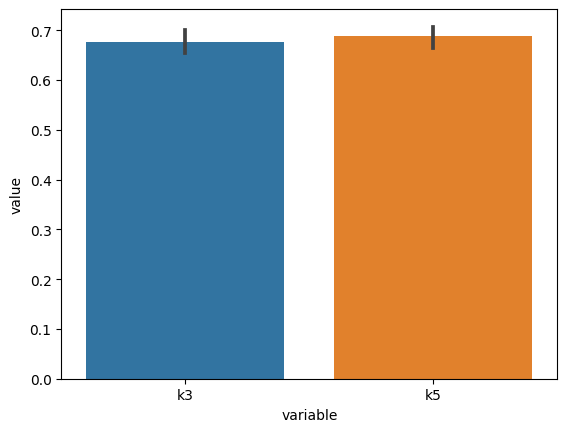

In [ ]:
#We can also plot these data, for example with the Seaborn library
import seaborn as sns

#The SNS barplot would like to have a long format dataframe
acc = {'rs': rss, 'k3': acc3, 'k5': acc5}
df = pd.DataFrame(data=acc)
df_long = pd.melt(df, id_vars=['rs'], value_vars=['k3','k5']) #to long format

#We use the default error bars here. Look in the documentation what these mean, because this has changed between seaborn versions.
#If you include a plot with error bars in your report, tell the reader in the caption what the error bars show.
ax = sns.barplot(x="variable", y="value",data = df_long)

## Exercise 3


* Plot the same graph, but now with the standard error as the error bars
* Increase the number of repeats to 1000 (i.e., run the loop earlier with random states varying between 0 and 999) and plot the distributions of the values using Seaborn's histplot (example code: sns.histplot(penguins, x="flipper_length_mm", hue="species", element="poly"))

**Answers below**

Seaborn version: 0.12.2


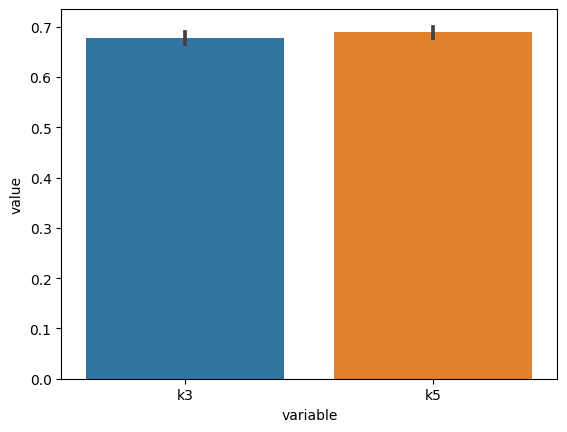

In [ ]:
#In this case, you can look up how the SE relates to the confidence interval and find that 68% is one standard error.
#Look in the documentation for barplot for Seaborn, because this can change.
print("Seaborn version:", sns.__version__)
ax = sns.barplot(x="variable", y="value",data=df_long, errorbar=('ci', 68))

In [ ]:
#Repeating splitting, training and testing 1000 times takes a bit of time, so we do it in a different cell from the plotting
acc3 = []
acc5 = []
rss = list(range(0, 999)) #1000 random states, but the rest is the same
for rs in rss:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

    clf = KNeighborsClassifier(n_neighbors = 3)
    clf.fit(X_train.values, y_train.values)

    acc3.append(clf.score(X_test.values, y_test.values))


    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train.values, y_train.values)

    acc5.append(clf.score(X_test.values, y_test.values))
    
print(np.mean(acc3), np.mean(acc5))

0.6643029584206054 0.6832210361622125


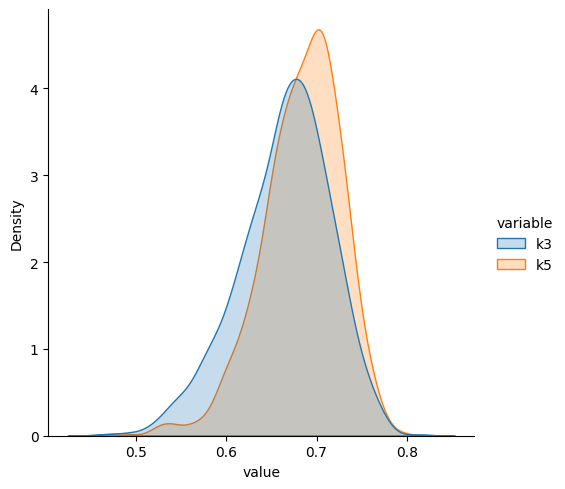

In [ ]:
#We now use the 1000 values and plot a density plot to get a sense of whether the distribution of accaracy values differ
acc = {'rs': rss, 'k3': acc3, 'k5': acc5}
df = pd.DataFrame(data=acc)
df_long = pd.melt(df, id_vars=['rs'], value_vars=['k3','k5'])
df_long.head()
sns.displot(df_long, x="value", hue="variable", kind="kde", fill=True)

# Statistical testing

While the error bars provide some indication of whether the accuracy of the two models differ across all possible values of the random state (and thus splits in training and test), statistical testing is needed to draw conclusions.

Because we have two models, we can make use of a t-test. T-tests are one of the tests in the tradition of null hypothesis significance testing. The idea is that two hypotheses are formulated (the null-hypothesis and the alternative hypothesis). A test is then performed to determine whether the data support the rejection of the null-hypothesis, leading to the conclusion that the alternative hypothsis must hold.

In this instance, the two hypotheses are:
* Null: The accuracy of k = 3 in the population (of all random splits) equals the accuracy of k = 5 (so we do not have an a priori reason to believe one of the models is better - you can argue about this)
* Alternative: The accuracy of k = 3 in the population differs from the accuracy of k = 5

Because we created two lists by systematically varying the random state, the parallel observations (e.g., value 1 in the list of k = 3 and value 1 in the list of k = 5) are linked. This means that we best rely on the related samples t-test.

In [ ]:
#We still do not know whether this represents a statistically significant difference
#Question: can we best consider the data as paired or not?
#Pro-paired = samples with identical splits in train/test

#I repeat the code here, to get the original list 20 back
#Note that if you perform the test on the 1000 samples, the difference is significant
acc3 = []
acc5 = []
rss = list(range(0, 20))
for rs in rss:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

    clf = KNeighborsClassifier(n_neighbors = 3)
    clf.fit(X_train.values, y_train.values)

    acc3.append(clf.score(X_test.values, y_test.values))


    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train.values, y_train.values)

    acc5.append(clf.score(X_test.values, y_test.values))

from scipy import stats
stats.ttest_rel(acc3, acc5)


TtestResult(statistic=-0.8909029671951909, pvalue=0.3841243421295385, df=19)

## Exercise 4

* A p-value of around 0.38 is obtained. Does this mean that the null hypothesis needs to be accepted?
* Examine how the result changes when independent samples are assumed rather than paired samples.
* Increase the number of random states from 20 to 100 and compare the outcome of the t-test. Is there a difference? Can you explain the difference?
* Use the same method to compare a model of k = 3 and k = 7

**Answers below**

In [ ]:
# No, p = 0.38 is higher than the commonly used threshold of 0.05, so we do not reject the null hypothesis

#To perform the independent samples t-test:
stats.ttest_ind(acc3, acc5)
#The result is the same (not significant), but the p-value a bit higher in this instance

Ttest_indResult(statistic=-0.6659165514759956, pvalue=0.509486964595123)

# ANOVA

In the exercise we have compared k = 3, k = 5 and k = 7, but with sepate t-tests. Suppose we wanted to tell whether the accuracy of all three models were the same in the population. We could compare 3 with 5, 5 with 7, and 3 with 7, but this causes issues with the number of tests (for each test, there is a chance of a type-I error), and it could lead to inconsistent results (e.g., 3 = 5, 5 = 7 but not 5 = 7). A test that compares all three in one comparison is therefore preferred. This is the purpose of the ANOVA (ANalysis Of VAriance).

As with the t-test there are two versions (actually three, but let's start with the main difference):
* Paired samples assumed
* Independent samples assumed

If we vary the random state systematically, this means that we need to use the paired samples version. There are two versions of this 'repeated measurements' ANOVA: a univariate version and a multivariate assumption. The difference is in the assumptions of the distributions of the underlying data. Both are a bit more complicated to perform than the independent samples version. 

Here we therefore first ensure we have independent samples (by using different values of the random states for the three k-NN models), and then use the 'one-way' (independent samples) ANOVA.


In [ ]:
from scipy.stats import f_oneway
import random 

#from: https://stackoverflow.com/questions/3352737/how-to-randomly-partition-a-list-into-n-nearly-equal-parts
def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

n_sample = 100
rss = list(range(0, n_sample*3))

[k3_rs, k5_rs, k7_rs] = partition(rss, 3)

def rep_acc(rss, k):
    acc = []
    for rs in rss:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(X_train.values, y_train.values)
        acc.append(clf.score(X_test.values, y_test.values))
    return(acc)
    
acc3 = rep_acc(k3_rs, 3)    
acc5 = rep_acc(k5_rs, 5)    
acc7 = rep_acc(k7_rs, 7)    

f_oneway(acc3, acc5, acc7)



F_onewayResult(statistic=11.782899330247472, pvalue=1.1902294596958236e-05)

## Exercise 5

* Formulate the null hypothesis and alternative hypothesis
* Interpret the p-value
* Reduce the number of values per sample to 20 and examine the p-value. How do you explain the differnce in the result for n = 20 and n = 100?
* Go back to having 20 random states per model and generate the acc3, acc5 and acc7 lists. Now compared each of these lists with paired samples t-tests (i.e., 3 with 5, 5 with 7 and 3 with 7). Are the results consistent with the ANOVA? If you would want to use Bonferroni correction, what p-values are considered to be significant? (if you want to keep the overall type-I error rate at 5%).

**Answers below**


In [ ]:
# Null: the mean accuracy for k=3 equals that for k=5 equals that for k=7 (mu3=mu5=mu7)
# Alternative: not null, so either mu3!=mu5, mu3!=mu7, mu5!=mu7 or mu3!=mu5!=mu7, but short: !(mu3=mu5=mu7)

#The p-value of 0.0003389 is smaller than 0.05, and therefore the null hypothesis of equal accuracy across the models must be rejected

n_sample = 20
rss = list(range(0, n_sample*3))

[k3_rs, k5_rs, k7_rs] = partition(rss, 3)

def rep_acc(rss, k):
    acc = []
    for rs in rss:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(X_train.values, y_train.values)
        acc.append(clf.score(X_test.values, y_test.values))
    return(acc)
    
acc3 = rep_acc(k3_rs, 3)    
acc5 = rep_acc(k5_rs, 5)    
acc7 = rep_acc(k7_rs, 7)    

f_oneway(acc3, acc5, acc7)

#p = 0.12, so we no longer reject the null hypothesis

F_onewayResult(statistic=1.3318024393916583, pvalue=0.27209021510146414)

In [ ]:
#comparisons with t-tests
#we use the independent samples t-test, because each model is tested with a different set of random states
#k=3 vs k=5
[t35, p35] = stats.ttest_ind(acc3, acc5)
print(t35, p35)
#k=5 vs k=7
[t57, p57] =stats.ttest_ind(acc5, acc7)
print(t57, p57)
#k=3 vs k=7
[t37, p37] = stats.ttest_ind(acc3, acc7)
print(t37, p37)
#A significant outcome is found for the k=3,k=5 comparison (p = 0.03), but here it is important to realise that three tests were performed, which increases the risk
#of a type-I error overall (p(no_typeI error) = 1-(0.05)^3)
#Typically, the critical value is therefore reduced by dividing the critical p-value by the number of comparisons
#With that adjusted p-value no significant difference is found (0.0315 > 0.0166), in line with the ANOVA results
print("Adjusted critical p-value: ", 0.05/3)

-1.5799328097373202 0.1224113701955222
0.17796643804450835 0.8596946769920857
-1.313859568160374 0.19677041284768626
Adjusted critical p-value:  0.016666666666666666


# Majority class

So far, we have compared models, but we haven't asked the question whether any of the predictions is better than chance. The question arises what "chance" means. One could argue that "chance" means 50%, because there are two response options ("Accept" and "Reject"). But a baseline model can do better than that. It can predict that everyone accepts screening (earlier we saw that more decisions were "Accept" than "Reject). It will then incorrectly predict all the "Reject" observations, but will achieve a better than 50% accuracy.

We here use a one-sample t-test. For this test the null-hypothesis is as follows:
* Null: The accuracy of the model with k = 3 is no better than always predicting the majority class.

Previously, we tested without an assumption of the direction of the alternative hypothesis: we assumed that k = 5 could be better, or worse than k = 3. Here, we might assume that k = 3 is better than always predicting the majority class. This changes the null-hypothesis and it makes that we perform a one-sided (rather than two-sided test):
* Alternative: The accuracy of the model with k = 3 is better than always predicting the majority class.

It turns out, the accuracy of k = 3 is worse than predicting the majority class.

In [ ]:
#Is any of this better than predicting the majority class?
#One option is to use a one-sample t-test

#the majority class proportion is:
mc_prop = np.mean(y)

#Neither seem to be better than predicting the majority class
result = stats.ttest_1samp(acc3, mc_prop, alternative='greater')

print(mc_prop, np.mean(acc3), result.pvalue)


0.6955602536997886 0.6651260504201679 0.996975418248917


## Exercise 6

* Examine whether a two-sided t-test does show a significant difference
* Examine whether the same result is found for k = 5
* Examine whether the outcome depends on the number of random states used (20 to 100)

**Answers below**

In [ ]:
result = stats.ttest_1samp(acc3, mc_prop, alternative='two-sided')

print(mc_prop, np.mean(acc3), result.pvalue) #surprisingly this suddenly gives a significant result

#this does not make sense, so we try less as well
result = stats.ttest_1samp(acc3, mc_prop, alternative='less')
print(mc_prop, np.mean(acc3), result.pvalue)
#so it seem that the predictions are significantly below chance (which suggests some learning in itself, but a strange kind of learning)
#it is still strange that the p-value is smaller for the two-sided test than for the one-sided test

0.6955602536997886 0.6651260504201679 0.006049163502166123
0.6955602536997886 0.6651260504201679 0.0030245817510830613


In [ ]:
#a safe strategy is to stick with a two-sided test
#no effect of k = 5
result = stats.ttest_1samp(acc5, mc_prop, alternative='two-sided')
print(mc_prop, np.mean(acc5), result.pvalue)

#what you probably want to do here is to increase the number of random seeds to get a better sense of the actual (population) accuracy

0.6955602536997886 0.6886554621848738 0.5436778252360178


In [ ]:
#rerun the splitting and fitting
n_sample = 100
rss = list(range(0, n_sample*3))

[k3_rs, k5_rs, k7_rs] = partition(rss, 3)

def rep_acc(rss, k):
    acc = []
    for rs in rss:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)
        clf = KNeighborsClassifier(n_neighbors = k)
        clf.fit(X_train.values, y_train.values)
        acc.append(clf.score(X_test.values, y_test.values))
    return(acc)
acc3 = rep_acc(k3_rs, 3)    
acc5 = rep_acc(k5_rs, 5)    
acc7 = rep_acc(k7_rs, 7)       

#perform the t-tests
result = stats.ttest_1samp(acc3, mc_prop, alternative='two-sided')
print('k = 3', mc_prop, np.mean(acc3), result.pvalue)     

result = stats.ttest_1samp(acc5, mc_prop, alternative='two-sided')
print('k = 5', mc_prop, np.mean(acc5), result.pvalue)     

result = stats.ttest_1samp(acc7, mc_prop, alternative='two-sided')
print('k = 7', mc_prop, np.mean(acc7), result.pvalue) 

#We find below chance performance for k = 3 and k = 5, but not for k = 7
#Overall the predictions of this model are not very impressive

k = 3 0.6955602536997886 0.6640336134453781 2.6206348272946995e-07
k = 5 0.6955602536997886 0.6769747899159664 0.00012462749432082013
k = 7 0.6955602536997886 0.6906722689075632 0.2499802394124516


# ROC-curve

When we look at the accuracy of the models, it seems that they do little to predict people's choices. But is this correct? So far the models have assumed that if the majority of the neighbours indicates one class, the model should predict that class. Maybe this is not a good choice. Maybe only 30% of the neighbours (in line with how often people choose "Accept") should be "Accept" to predict "Accept".

A method to systematically investigate the effect of this "threshold" is by examining the ROC-curve. This curve is constructed by varying the threshold value and to compute the false positive rate ("Accept" is predicted, but it should have been "Reject") and the true positive rate ("Accept" is predicted and it should have been "Accept").

We use k = 5 and one split between training and test. Some predicting seems to be going on, because the curve deviates from a straight line corner-to-corner.

In [ ]:
#ROC curve
#A single ROC curve can be obtained by training with a single random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, stratify = y)

clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train.values, y_train.values)

#we then need to compute the chance of being an accept or reject according to the model
y_scores = clf.predict_proba(X_test.values)

#by varying the threshold (ROC_curve chooses the values for us), we get the false and true positive rates
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

#convert this into a data frame for plotting with seaborn (with labels)
tfp = {'thres': threshold, 'false_positive_rate': fpr, 'true_positive_rate': tpr}
df = pd.DataFrame(data=tfp)

sns.lineplot(x='false_positive_rate', y = 'true_positive_rate', data = df)


## Exercise 7 

* Compute the fpr en tpr across 100 values of the random state and compute the average fpr and tpr for each threshold
* Create a new ROC-curve as above with these average values

**Answers below**

In [ ]:
#we now put this in a loop and store the results for each rs value. Technically we do not need to store the rs values for computing the average per threshold.
df = pd.DataFrame()

rss = list(range(0, 100))
for rs in rss:
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

  clf = KNeighborsClassifier(n_neighbors = 5)
  clf.fit(X_train.values, y_train.values)

  y_scores = clf.predict_proba(X_test.values) #we need these probabilities to computer the fpr and tpr for the ROC curve

  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  
  tfp = {'thres': threshold, 'false_positive_rate': fpr, 'true_positive_rate': tpr, 'rs': [rs]*len(threshold)}
  df = df.append(pd.DataFrame(data=tfp))

In [ ]:
#compute average and plot curve
av_values = df.groupby("thres").mean().reset_index()
sns.lineplot(x='false_positive_rate', y = 'true_positive_rate', data = av_values)


# AUC

The ROC-curve suggests that the model with k = 5 may do better than chance. To express how much better, we can compute the area under the curve, which indicates how much the curve deviates from the corner-to-corner line. We obtain a value of almost 0.7 for the values used so far.

In [ ]:
#The area under the curve can be computed using the auc function

auc(fpr, tpr)

#Exercise: compute the area under the curve for 1000 random states for k = 3 and k = 5
#Plot these distributions of the auc

# Distribution of AUCs

We can now investigate how often an AUC of around 0.7 is obtained for different splits between training and test.

For this, we use a similar loop as before. The plot showing the distribution of the AUCs and accuracy shows that for k = 5, we find that the accuracy is often around 0.7, but the AUC more commonly around 0.6.

In [ ]:
nr_rs = 300

rss = list(range(0, nr_rs))

acc5 = []
auc5 = []
for rs in rss:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train.values, y_train.values)

    acc5.append(clf.score(X_test.values, y_test.values))
    
    y_scores = clf.predict_proba(X_test.values)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    auc5.append(auc(fpr,tpr))


res = {'rs': rss, 'acc': acc5, 'auc': auc5}
df = pd.DataFrame(data=res)
df_long = pd.melt(df, id_vars=['rs'], value_vars=['acc','auc'])    
    
    
sns.histplot(data=df_long, x="value", hue = "variable", element="poly")

## Exercise 8

* Examine the distributions of the accuracy and AUC for k = 7
* Examine whether the AUC differs significantly between k = 5 and k = 7, using 20 and 100 random states.

**Answers below**


In [ ]:
#we need to adjust the code for k = 7
#we could leave the names of the variables the same, but let's change these too
nr_rs = 300

rss = list(range(0, nr_rs))

acc7 = []
auc7 = []
for rs in rss:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

    clf = KNeighborsClassifier(n_neighbors = 7)
    clf.fit(X_train.values, y_train.values)

    acc7.append(clf.score(X_test.values, y_test.values))
    
    y_scores = clf.predict_proba(X_test.values)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    auc7.append(auc(fpr,tpr))


res = {'rs': rss, 'acc': acc7, 'auc': auc7}
df = pd.DataFrame(data=res)
df_long = pd.melt(df, id_vars=['rs'], value_vars=['acc','auc'])    
    
    
sns.histplot(data=df_long, x="value", hue = "variable", element="poly")

In [ ]:
nr_rs = 100 # vary this to examine whether the number of states matters
rss = list(range(0, nr_rs))

auc5 = []
auc7 = []
for rs in rss:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

    clf = KNeighborsClassifier(n_neighbors = 5)
    clf.fit(X_train.values, y_train.values)

    y_scores = clf.predict_proba(X_test.values)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    auc5.append(auc(fpr,tpr))

    clf = KNeighborsClassifier(n_neighbors = 7)
    clf.fit(X_train.values, y_train.values)

    y_scores = clf.predict_proba(X_test.values)
    fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
    auc7.append(auc(fpr,tpr))
    
result = stats.ttest_rel(auc5, auc7)
print(result)    

NameError: ignored

# Cross-validation

So far we have used the test-set to compare k-NN models with different values of k. This is not the common way of determining the best value of k. Instead, the training set is repeatedly split in a training and a validation part and with these parts, the best value of k is determined (e.g., the k that leads to the best average accuracy). 

The book introduces various ways of splitting the training set:
* Cross-validation
* Leave-one-out (a version of cross-validation)
* 5x2 cross-validation
* Bootstrapping

We here look into cross-validation and bootstrapping, because they seem to be more commonly used than the other two methods. Bootstrapping is often recommended for smaller data-sets. It allows for generating a large number of splits between training and test, whereas for cross-validation, the number of splits depends on the number of folds.

First we look at applying cross-validation without parameter tuning. We simply use cross-validation to get a sense of the accuracy on the training-set. We get an average 67% accuracy on the training set with a random state equal to 10 and k = 5. Note that one fold achieves better than 70% accuracy.


In [ ]:
from sklearn.model_selection import cross_val_score

#set up the k-NN with k = 5
knn_cv = KNeighborsClassifier(n_neighbors=5)

#put the test set to the side
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, stratify = y)

#compute the accuracy on the training set by using 5-fold cross-validation
cv_scores = cross_val_score(knn_cv, X_train.values, y_train.values, cv=5)

print(cv_scores, np.mean(cv_scores))


[0.73239437 0.61971831 0.64788732 0.66197183 0.64285714] 0.6609657947686116


## Exercise 9

* Examine whether using 10 folds changes the average accuracy
* Systematically vary the number of folds from 2 to 100 and compute the average accuracy.
* Plot the average accuracy as a function of the number of folds
* Look up how to compute the AUC instead of the accuracy and create the same plot, but for AUC instead of accuracy

In [ ]:
cv_scores = cross_val_score(knn_cv, X_train.values, y_train.values, cv=10)

print(cv_scores, np.mean(cv_scores)) #0.66 vs 0.6555 not much difference

[0.69444444 0.58333333 0.69444444 0.61111111 0.6        0.71428571
 0.65714286 0.62857143 0.74285714 0.62857143] 0.6554761904761903


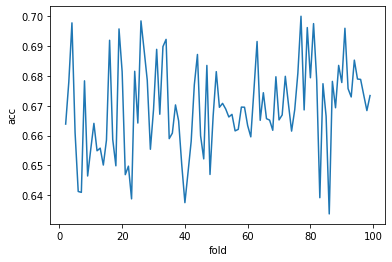

In [ ]:
folds = list(range(2, 100))

av_acc = []
for fold in folds:
  cv_scores = cross_val_score(knn_cv, X_train.values, y_train.values, cv=fold)
  av_acc.append(np.mean(cv_scores))

res = {'fold': folds, 'acc': av_acc}
df = pd.DataFrame(data=res)
    
    
sns.lineplot(data=df, x="fold", y="acc") #it seems quite random. the range appears to be between 0.63 and 0.70

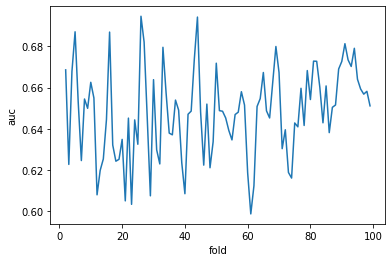

In [ ]:
#Here you can simply add that you want the AUC in the cross_val_score function
#You can try and implement the cross validation yourself, but that is more work

folds = list(range(2, 100))

av_auc = []
for fold in folds:
  cv_scores = cross_val_score(knn_cv, X_train.values, y_train.values, cv=fold, scoring="roc_auc",)
  av_auc.append(np.mean(cv_scores))

res = {'fold': folds, 'auc': av_auc}
df = pd.DataFrame(data=res)
    
    
sns.lineplot(data=df, x="fold", y="auc") #the randomness appears to decrease with more folds

# Grid search

We can also use cross-validation to systematically look for the best value of k (in a k-NN).

This is done by splitting the training set into folds and to use n-1 folds for training and 1 fold for validation. Each split yields one value for accuracy. The average across folds is used to select the best value for k. We here find that 9 neighbours yields the best accuracy on the training set (for the split between training and test using a random state of 10).

Note that after selecting the best value of k using cross-validation, the model needs to be fitted with this particular value of k on the entire training set, so that it can later be used on the test set.



In [ ]:
from sklearn.model_selection import GridSearchCV
knn5 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 10)}
knn_gscv = GridSearchCV(knn5, param_grid, cv=5)
knn_gscv.fit(X_train.values, y_train.values)

#fit the best fitting model to the entire training set
knn_gscv.fit(X_train.values, y_train.values)

#get the best performing value for k
knn_gscv.best_params_

{'n_neighbors': 9}

# Applying the test-set

We can now apply the optimal k-NN model to the test set.

In [ ]:
y_scores = knn_gscv.predict_proba(X_test.values)
fpr, tpr, threshold = roc_curve(y_test.values, y_scores[:, 1])
auc5 = auc(fpr, tpr)
acc5 = knn_gscv.score(X_test.values, y_test.values)

print(auc5, acc5)

0.6636546184738956 0.7394957983193278


## Exercise 10

* Repeatedly split the original data-set into training and test (using 200 random states)
* Find the best value for k (between 1 and 10 neighbours) for each split between training and test, based on accuracy on the training set and 5 folds
* Store these best values for k in a list
* Compute for each of these best models the AUC and accuracy on the test-set
* Plot distributions of these AUCs, accuracy and k-values


In [ ]:
nr_rs = 200 # number of states
rss = list(range(0, nr_rs))

knn_model = KNeighborsClassifier()

k_values = []
accuracy = []
aucs = []
for rs in rss:#this loop takes a bit of time. You can print de value of rs to get a sense how far the simulation is
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)
    
    param_grid = {'n_neighbors': np.arange(1, 10)}
    knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)
    
    #fit the best fitting model to the entire training set
    knn_gscv.fit(X_train.values, y_train.values)

    #get the best performing value for k
    k_values.append(knn_gscv.best_params_['n_neighbors'])
    fpr, tpr, threshold = roc_curve(y_test.values, y_scores[:, 1])
    auc_value = auc(fpr, tpr)
    aucs.append(auc_value)
    acc_value = knn_gscv.score(X_test.values, y_test.values)
    accuracy.append(acc_value)
    


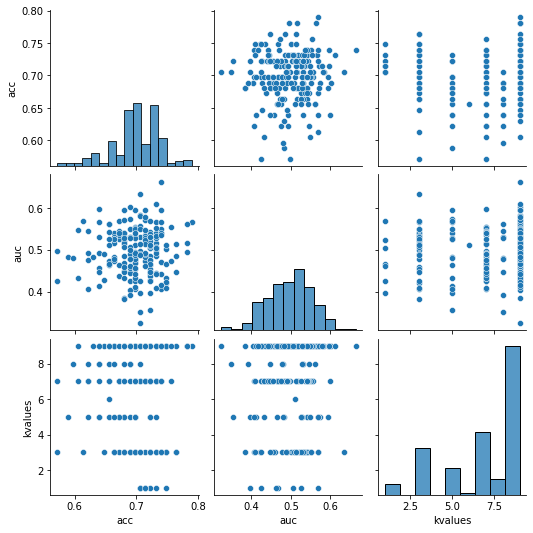

In [ ]:
#plot the results using a scatterplot matrix, so that we can see which values of each variable go with which values of the other variable, as well as 
#the distributions
res = {'acc': accuracy, 'auc': aucs, 'kvalues': k_values}
df = pd.DataFrame(data=res)


sns.pairplot(df)
    
 

# Bootstrapping

Sklearn does not seem to have specific procedures to perform the bootstrapping method (in the most recent version; there is a "resample" method, but this does not seem to be as easy to use as the cross-validation method as above). 

For understanding the method, it may help to program it ourselves. The idea with the bootstrap is to generate a sample of the size of the training-set but with replacement (otherwise the bootstrap sample would be identical to the training-set). All the items that were not in the bootstrap sample, go into the validation set.

One package that we can use is the numpy package.


In [ ]:
#set the random seed
np.random.seed(10)

#find the rownumbers that went into the training set
idx = X_train.index.values

#create a bootstrapped sample of the size of the training-set from this list of rownumbers
bootstrap = np.random.choice(idx, size=len(idx), replace=True)

#find out which rownumbers are not in the bootstrap -> validation
not_selected = np.setdiff1d(idx, bootstrap)

#check how many samples went into the validation
print(len(idx), len(bootstrap), len(not_selected))

## Exercise 11

* Try 300 values of the seed and determine the size of the validation set for each of the values
* Plot the distribution of the size of the validation set

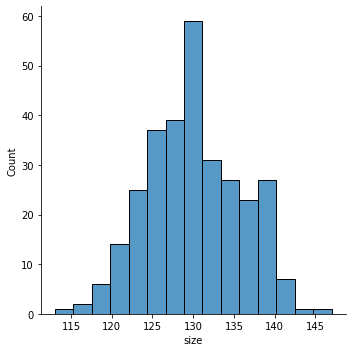

In [ ]:
nr_rs = 300 # number of states
rss = list(range(0, nr_rs))
val_size = []
val_ratio = []
for rs in rss:
  #set the random seed
  np.random.seed(rs)

  #find the rownumbers that went into the training set
  idx = X_train.index.values

  #create a bootstrapped sample of the size of the training-set from this list of rownumbers
  bootstrap = np.random.choice(idx, size=len(idx), replace=True)

  #find out which rownumbers are not in the bootstrap -> validation
  not_selected = np.setdiff1d(idx, bootstrap)

  val_size.append(len(not_selected))
  val_ratio.append(len(not_selected)/len(idx))


res = {'random_state': rss, 'size': val_size, 'ratio': val_ratio}
df = pd.DataFrame(data=res)

sns.displot(res, x="size")


# Repeated bootstrapping

We can now repeatedly split the training set between training and validation set. We here use a k-NN with k = 5 and look at the distribution of accuracy scores that we get across splits of the training set.

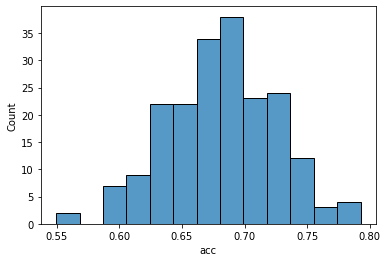

In [ ]:
rss = list(range(0, 200))


def bootstrap_split(train_set, test_set):
    idx = train_set.index.values
    bootstrap = np.random.choice(idx, size=len(idx), replace=True)
    not_selected = np.setdiff1d(idx, bootstrap)
    x_train = train_set.loc[bootstrap]
    x_val = train_set.loc[not_selected]
    y_train = test_set.loc[bootstrap]
    y_val = test_set.loc[not_selected]
    return x_train, x_val, y_train, y_val
    
acc = []
    
for rs in rss:
    np.random.seed(rs)
    x_trn, x_val, y_trn, y_val = bootstrap_split(X_train, y_train)
    knn_cv = KNeighborsClassifier(n_neighbors=5)
    clf.fit(x_trn.values, y_trn.values)
    acc.append(clf.score(x_val.values, y_val.values))

    
res = {'rs': rss, 'acc': acc}
df = pd.DataFrame(data=res)
    
    
sns.histplot(data=df, x="acc")

In [ ]:
#check whether 37% goes into test set during bootstrapping
rss = list(range(0, 200))

def bootstrap_split(train_set, test_set):
    idx = train_set.index.values
    bootstrap = np.random.choice(idx, size=len(idx), replace=True)
    not_selected = np.setdiff1d(idx, bootstrap)
    x_train = train_set.loc[bootstrap]
    x_val = train_set.loc[not_selected]
    y_train = test_set.loc[bootstrap]
    y_val = test_set.loc[not_selected]
    return x_train, x_val, y_train, y_val

test_prop = []

for rs in rss:
    np.random.seed(rs)
    x_trn, x_val, y_trn, y_val = bootstrap_split(X_train, y_train)
    test_prop.append(len(y_val)/len(y_train))
    
print(np.mean(test_prop))

0.36759887005649716


## Exercise 12

* Now use the above bootstrap example to find the best value of k for a training set generated with the random state equal to 10 with 10 bootstrapped training and validation splits
* Vary the number of boostrapped training- and validation splits between 10 to 100 in steps of 10 and determine best value for k and accuracy for this best value of k
* Plot the values of k as a function of the number of bootstrap samples (think of a good way of showing this)

# Comparing models with different data-sets

The book chapter ends with a discussion of how to compare the performance of different models with different data-set. The main point to take from this section is that in this instance it is better to go for non-parametric tests. These are tests that do not make the assumption that the data are normally distributed. While parametric tests (that have this assumption) are somewhat robust against a violation of this assumption, it can make sense to move to tests that do not have this assumption. One down-side of non-parametric tests, compared to parametric tests, is that they are more conservative. If the alternative hypothesis holds for your data, they are less likely to reject the null-hypothesis than a parametric test.

The book is not very clear on wat data the non-parametric tests should be performed. One suggestion is to use the tests on the outcomes of the folds in a cross-validation. If we assume 5 folds (not uncommon), this would mean that we are performing a test on two samples of each 5 values, which is highly unlikely to yield a rejection of the null hypothesis (even if the difference in performance of the two models is large). The folds typically used on the training set (to tune the hyperparameters), but ideally, we would like to say whether the models differ in performance on the test set.

In [ ]:
X1, X2, y1, y2 = train_test_split(X, y, random_state = 10, stratify = y, train_size = 0.5)

#check that the two data-sets are about the same length
print(len(X1), len(X2))

#choose a value for the random state
rs = 100

def perf_knn(X, y, rs):
    #split the data in train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)

    #reuse code to find the best value of k  
    knn_model = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 10)}
    knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)
    knn_gscv.fit(X_train.values, y_train.values)

    #fit the best fitting model to the entire training set
    knn_gscv.fit(X_train.values, y_train.values)

    #get the performance for the best model
    acc_knn = knn_gscv.score(X_test.values, y_test.values)
    return(acc_knn)


def perf_rf(X, y, rs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs, stratify = y)
    #now use the same method for the random forest
    #tune the parameters with cross-validation
    #to reduce the search time, we focus on tuning just the number of estimators and set the rest to
    #their default values
    param_grid = {
        'n_estimators': [100, 1000]
    }

    forest = RandomForestClassifier()
    rf_grid = GridSearchCV(estimator = forest, param_grid = param_grid, cv = 5)

    #fit the model to the entire training set
    rf_grid.fit(X_train.values, y_train.values)

    #get the performance for the best fitting model
    acc_rf = rf_grid.score(X_test.values, y_test.values)
    return(acc_rf)

acc_knn = perf_knn(X1, y1, rs)
acc_rf = perf_rf(X2, y2, rs)

print(acc_knn, acc_rf)


236 237
0.6440677966101694 0.7


# Final notes

This notebook has addressed several topics of chapter 20 and has shown how to address these in Python. Several topics were not covered. These are:

* Factors, responses, strategy of experimentation. Here we focused on hyperparameter tuning using a grid, similar to Figure 20.2c in the book.
* Response surface design. The book is not very clear on how to apply this in practice.
* Blocking. We have used pairing (at the bottom of page 604) rather than blocking, and used randomization for bootstrapping
* Guidelines for machine learning experiments. We compared two k-NN models and one random forest model, but this comparison should be more systematic.
* 5x2 cross-validation. Instead, we used k-fold cross-validation.
* Interval estimation. We briefly touched upon this topic when plotting bar graphs with error bars.
* Binomial test. We have focused on comparing summary statistics (e.g., accuracy, AUC). The binomial test is performed on the individual predictions. It is related to the confusion matrix, which we have not used here.
* Approximate normal test. The t-test is more commonly used for two samples.
* McNemar's test. This is also related to the confusion matrix, which we have not discussed.
* 5x2 cv paired t-test and F-test. Since we did not look at 5x2 cross-validation, this topic was not discussed either.
* Kruskal-Wallis test. This is an extension of the Wilcoxon-test that we did cover.
* Multivariate test. This is an entire field of statistics, which would take too far to cover here.

We also saw that not all methods appear to be implemented in Python libraries. Sometimes it may therefore help to instead look at the R statistical package. As this software is specialized in statistics you may find some tests that are not implemented in Python (yet).

**Exam preparation:** The exam will be based almost uniquely on this Notebook. Make sure to understand what the code does and to be able to explain concepts such as bootstrapping, null-hypothesis significance testing, t-test, ROC, and AUC.